## impot packages

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
from wordcloud import WordCloud,STOPWORDS

### Read Data

In [3]:
df1 = pd.read_csv('drugsComTest_raw.tsv', sep = '\t')
df2 = pd.read_csv('drugsComTrain_raw.tsv', sep = '\t')
df = pd.concat([df1,df2])
df.head()

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   February 28, 2012           22  
1        May 17, 2009           17  
2  September 29, 2017            3  
3       March 5, 2017           35  
4    October 22, 2015            4

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


## Delete missing values
موارد خالی را حذف میکنیم **dropna()** با استفاده از تابع  

In [5]:
df = df.dropna()

In [6]:
df.describe()

Unnamed: 0         rating    usefulCount
count  213869.000000  213869.000000  213869.000000
mean   116076.924786       6.991149      28.094118
std     67016.705794       3.275792      36.401377
min         0.000000       1.000000       0.000000
25%     58122.000000       5.000000       6.000000
50%    115972.000000       8.000000      16.000000
75%    174018.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

### Using textblob
adding sentiment to df

Polarity

In [7]:
df['sentimentPolarity'] = df['review'].apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
df.head()

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  sentimentPolarity  
0   February 28, 2012           22           0.000000  
1        May 17, 2009           17           0.566667  
2  September 29, 2017            3           0.333333  
3       March 5, 2017           35           0.139063  
4    October 22, 2015            4           0.260926

Subjectivity

In [8]:
df['sentimentSubjectivity'] = df['review'].apply(lambda x: textblob.TextBlob(x).sentiment.subjectivity)
df.head()

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  sentimentPolarity  sentimentSubjectivity  
0   February 28, 2012           22           0.000000               0.440000  
1        May 17, 2009           17           0.566667               0.600000  
2  September 29, 2017            3           0.333333               0.500000  
3       March 5, 2017           35           0.139063               0.500000  
4    October 22, 2015            4           0.260926               0.550463

In [9]:
df.describe()

Unnamed: 0         rating    usefulCount  sentimentPolarity  \
count  213869.000000  213869.000000  213869.000000      213869.000000   
mean   116076.924786       6.991149      28.094118           0.064578   
std     67016.705794       3.275792      36.401377           0.222315   
min         0.000000       1.000000       0.000000          -1.000000   
25%     58122.000000       5.000000       6.000000          -0.043869   
50%    115972.000000       8.000000      16.000000           0.057500   
75%    174018.000000      10.000000      36.000000           0.173333   
max    232291.000000      10.000000    1291.000000           1.000000   

       sentimentSubjectivity  
count          213869.000000  
mean                0.499609  
std                 0.174873  
min                 0.000000  
25%                 0.408333  
50%                 0.501157  
75%                 0.600000  
max                 1.000000

In [10]:
positive = len(df[df['sentimentPolarity'] >= 0.33])
negative = len(df[df['sentimentPolarity'] <= -0.33])
neutral = len(df[(df['sentimentPolarity'] > -0.33) & (df['sentimentPolarity'] < 0.33)])


In [11]:
df = df.drop(['Unnamed: 0'] , axis= 1)
df

drugName                     condition  \
0              Mirtazapine                    Depression   
1               Mesalamine  Crohn's Disease, Maintenance   
2                  Bactrim       Urinary Tract Infection   
3                 Contrave                   Weight Loss   
4          Cyclafem 1 / 35                 Birth Control   
...                    ...                           ...   
161292             Campral            Alcohol Dependence   
161293      Metoclopramide               Nausea/Vomiting   
161294             Orencia          Rheumatoid Arthritis   
161295  Thyroid desiccated           Underactive Thyroid   
161296        Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "I&#039;ve tried a few antidepressants over th...    10.0   
1       "My son has Crohn&#039;s disease and has done ...     8.0   
2                           "Quick reduction of symptoms"     9.0   
3       "Contrave combines drugs that were used for al...     9.0   
4       "I have been on this birth control for one cyc...     9.0   
...                                                   ...     ...   
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  sentimentPolarity  \
0        February 28, 2012           22           0.000000   
1             May 17, 2009           17           0.566667   
2       September 29, 2017            3           0.333333   
3            March 5, 2017           35           0.139063   
4         October 22, 2015            4           0.260926   
...                    ...          ...                ...   
161292        May 31, 2015          125           0.262917   
161293    November 1, 2011           34          -0.276389   
161294      March 15, 2014           35          -0.223810   
161295  September 19, 2015           79           0.212597   
161296   December 13, 2014          116           0.085417   

        sentimentSubjectivity  
0                    0.440000  
1                    0.600000  
2                    0.500000  
3                    0.500000  
4                    0.550463  
...                       ...  
161292               0.449167  
161293               0.759722  
161294               0.369841  
161295               0.473143  
161296               0.583333  

[213869 rows x 8 columns]

## Patterns between drugs and sentiments

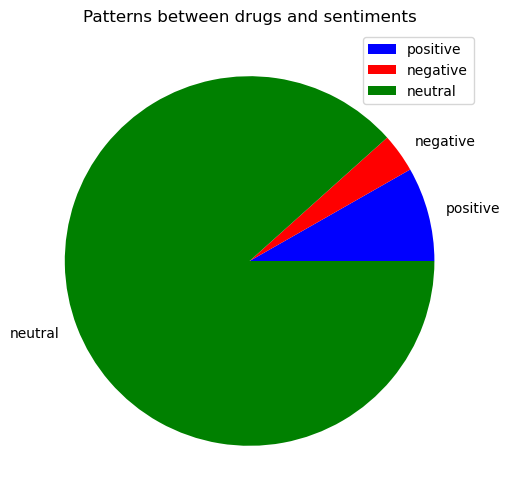

In [12]:
plt.figure(figsize=(8,6))
plt.pie([positive , negative, neutral] , labels=["positive","negative","neutral"] ,colors=["b","r","g"])
plt.title('Patterns between drugs and sentiments')
plt.legend()
plt.show()

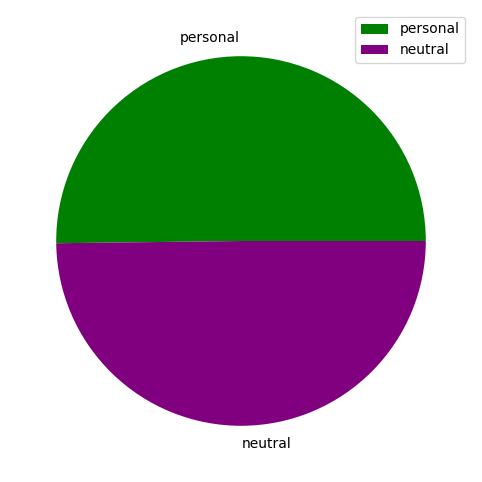

In [13]:
personal = len(df[df['sentimentSubjectivity'] > 0.5])
neutral1 = len(df[df['sentimentSubjectivity'] <= 0.5])
plt.figure(figsize=(8,6))
plt.pie([personal , neutral1] , labels=('personal','neutral'), colors=('green','purple'))
plt.legend()
plt.show()

### Plot

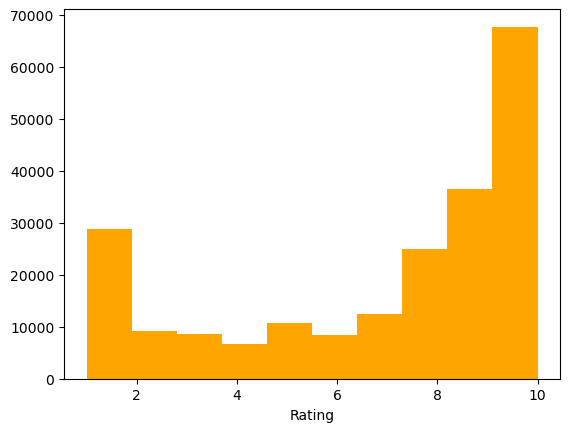

In [14]:
plt.Figure(figsize=(6,4))
plt.hist(df.rating,color='orange')
plt.xlabel('Rating')
plt.show()

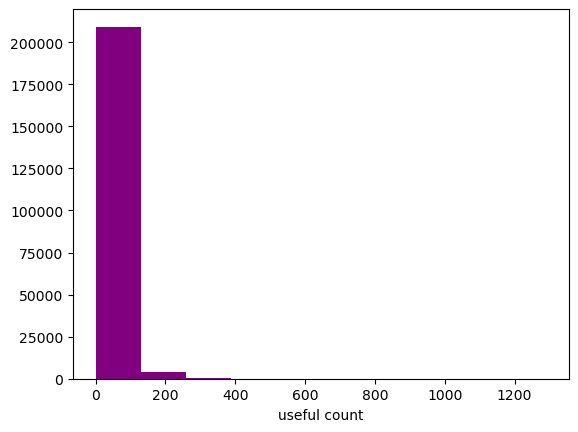

In [15]:
plt.Figure(figsize=(6,4))
plt.hist(df.usefulCount,color="purple")
plt.xlabel('useful count')
plt.show()

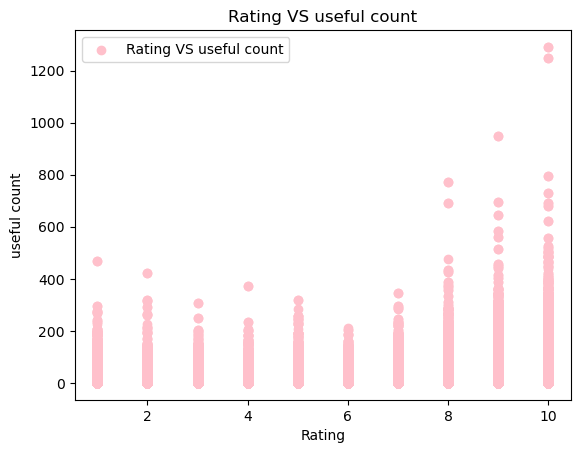

In [16]:
plt.Figure(figsize=(6,4))
plt.scatter(df.rating,df.usefulCount,color='pink',label = 'Rating VS useful count')
plt.xlabel('Rating')
plt.ylabel('useful count')
plt.title('Rating VS useful count')
plt.legend()
plt.show()

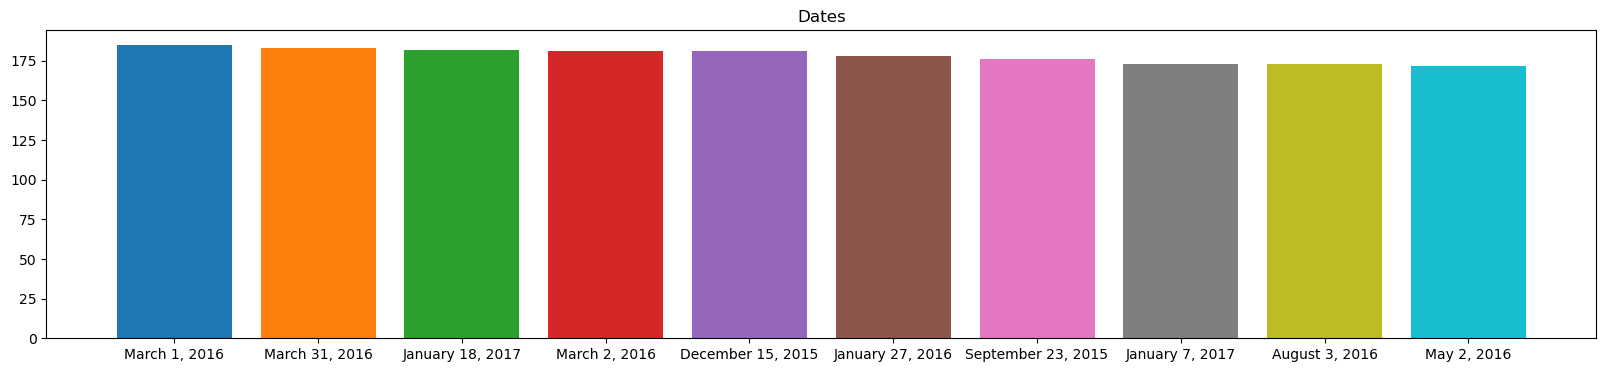

In [68]:
df.head()
z =df['date'].value_counts()[:10]
plt.figure(figsize=(20,4))
for i in range(10):
    label = z.index[i]
    value = z[i]
    plt.bar(label,value,)
plt.title("Dates")
plt.show()


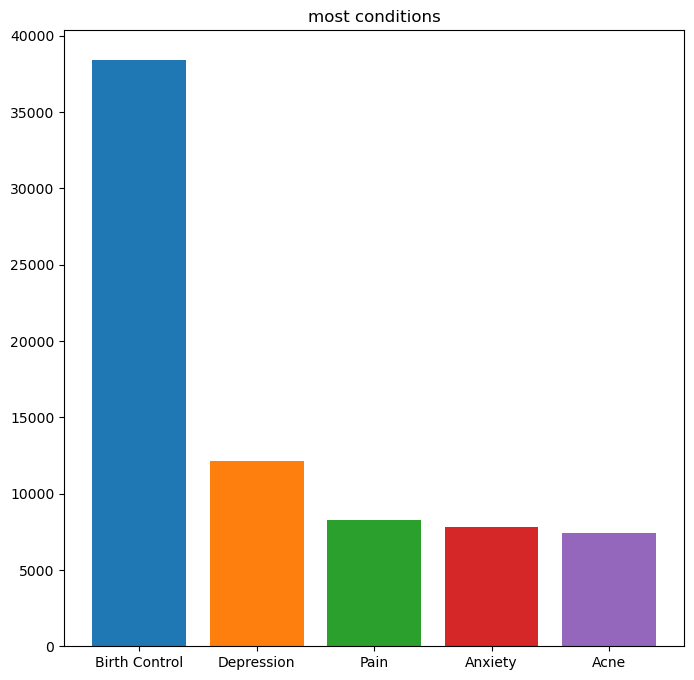

In [55]:
y = df['condition'].value_counts()[:5]
plt.figure(figsize=(8,8))
for i in range(5):
    label = y.index[i]
    value = y[i]
    plt.bar(label,value)
plt.title("most conditions")
plt.show()

Top 5 drugs

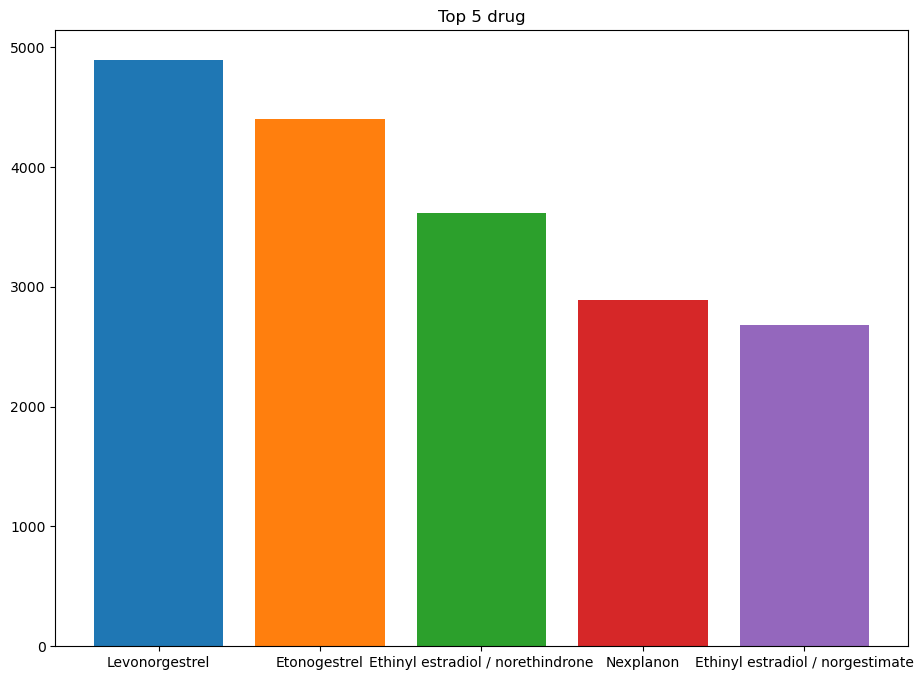

In [53]:
x =(df['drugName'].value_counts()[:5])
plt.figure(figsize=(11,8))
for i in range(5):
    label = x.index[i]
    value = x[i]
    plt.bar(label,value)
plt.title("Top 5 drug")
plt.show()

## wordclound
in this section I have no idea what you want from us so I found a code from G4G and I don`t know what it is.

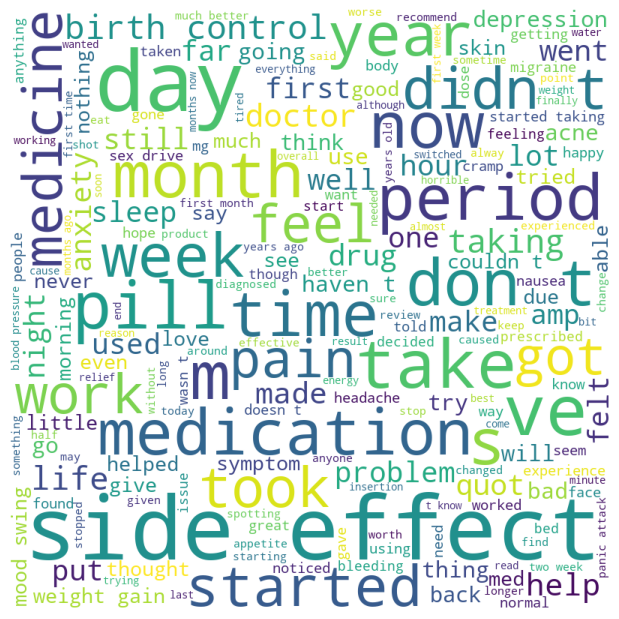

In [17]:
comment_words = ' '.join(df['review'].str.lower())

# Step 2: Generate the WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(comment_words)

# Step 3: Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# comment_words = ''
# stopwords = set(STOPWORDS)
 
# # iterate through the csv file
# for val in df['review']:
     

#     val = str(val)
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                       
# plt.figure(figsize = (6, 6), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
 
# plt.show()